# Topic: Nanshan Life Insurance- Insurance Claim Data Analysis 

### The aim of this project is to analyze and visualize the insurance data provided. From the perspective of the insurance provider, the main purposes are to:
##### 1. Identify the type of clients that are more likely to need insurance products
##### 2. Determine what are the most suitable products for these clients
##### 3. Analyze whether recent claims are related to future repurchases


In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np

file = pd.read_csv('claim0313/CLAIM/CLAIM.csv', encoding= 'big5')
refer = pd.read_excel('claim0313/Table.xlsx', encoding= 'big5')

names = refer['標籤'].tolist()
file.columns = names
# file.sort_values(['理賠日期'], inplace = True)
# file.set_index(['理賠日期'], inplace = True)
# file.drop(['案件流水號'], axis = 1, inplace = True)

The data provided by the company consists of two csv files, one is the datatable including all the insuarnce claim information such as the age of clients, the dates for insurance claims, the dollar amount for each claim, whether or not repurchases are made, and etc.  The second file provides the letter codes associated to the column names. Now that the two files are combined into one dataframe, further analysis can be done in the more efficient way. 

In [3]:
# some data are erroneous so we removed these rows from the datatable by setting new criteria
file = file[file['客戶年資'] >= 0]
file

,案件流水號,被保人性別,被保人年齡級距,客戶年資,疾病代碼,疾病名稱,就診醫院代碼,就診醫院名稱,本次事故理賠金額/千,理賠日期,五年內理賠幾次,五年內總理賠金額/千,保單最後購買日,已購買險種數,已購買保單總年化保費/千,再購保單生效日,再購險別,再購保單年化保費/千
0,1,F,02.21~40,16,A47202,橈骨骨折,DM0068,澄清綜合醫院（中港分院）,7,2017/10/25,NaN,NaN,16,1.0,18.0,NaN,NaN,NaN
1,2,M,03.41~60,16,A27902,冠狀動脈疾病,UM0011,新光醫院,18,2017/3/3,3.0,71.0,16,2.0,23.0,NaN,NaN,NaN
2,3,M,02.21~40,24,A29101,腦中風,UM0009,長庚醫院(林口、台北、桃園),5,2017/9/15,NaN,NaN,24,3.0,44.0,NaN,NaN,NaN
3,4,M,02.21~40,28,A36000,"攝護腺（前列腺）疾病（發炎,肥大等）",UM0098,台安醫院,0,2017/3/8,5.0,32.0,28,3.0,27.0,NaN,NaN,NaN
4,5,M,02.21~40,28,A48003,腕及手之脫臼，扭，拉，挫，捩傷,UM0100,博仁醫院,2,2017/7/6,7.0,133.0,27,4.0,44.0,NaN,NaN,NaN
5,6,M,03.41~60,19,A33001,牙周病,UD9999,中山分公司其他牙醫,25,2017/4/28,1.0,1.0,19,5.0,57.0,NaN,NaN,NaN
6,7,M,03.41~60,11,A15000,皮膚良性腫瘤,UM0150,國泰汐止分院,12,2017/8/31,NaN,NaN,11,4.0,26.0,NaN,NaN,NaN
7,8,M,02.21~40,31,A27902,冠狀動脈疾病,UM0001,台大醫院,2,2017/12/27,NaN,NaN,31,3.0,70.0,NaN,NaN,NaN
8,9,M,02.21~40,29,A18100,糖尿病,UM0039,北投振興醫院,6,2017/7/26,3.0,23.0,29,3.0,17.0,NaN,NaN,NaN
9,10,M,03.41~60,15,A35100,尿道/輸尿管結石,GM0004,阮綜合醫療社團法人阮綜合醫院,4,2017/12/22,NaN,NaN,15,3.0,3.0,NaN,NaN,NaN


#### The first question we would like to answer is what kind of clients are more likely to need insurance. 
We first group clients by age, gender and type of disease or injury and count the number of insurance claims made. 
(note that the word "age" (年資) used in our analysis refers to the number of years since the first purchase of Nanshan's insurance product)

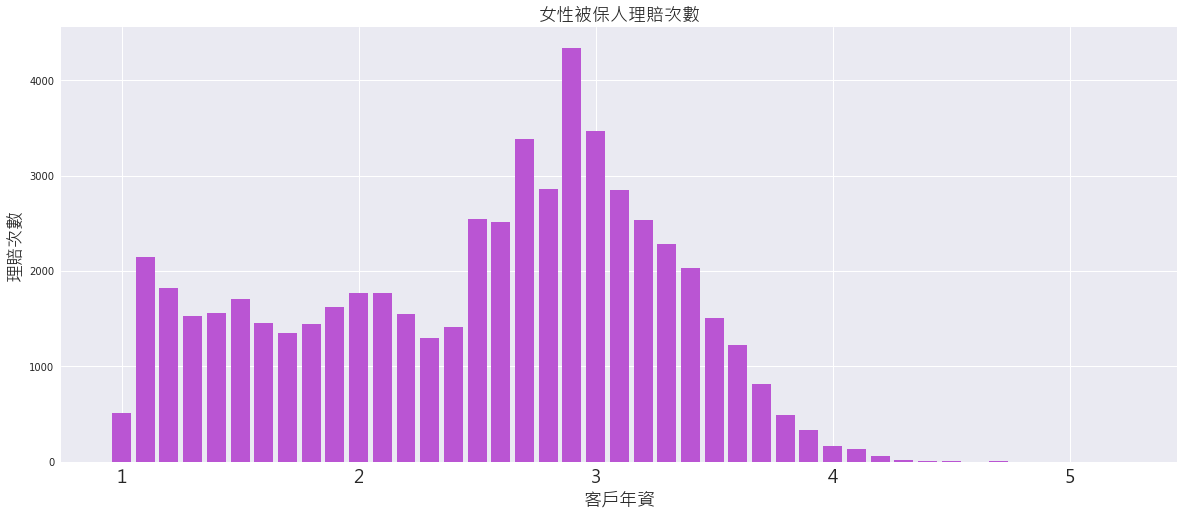

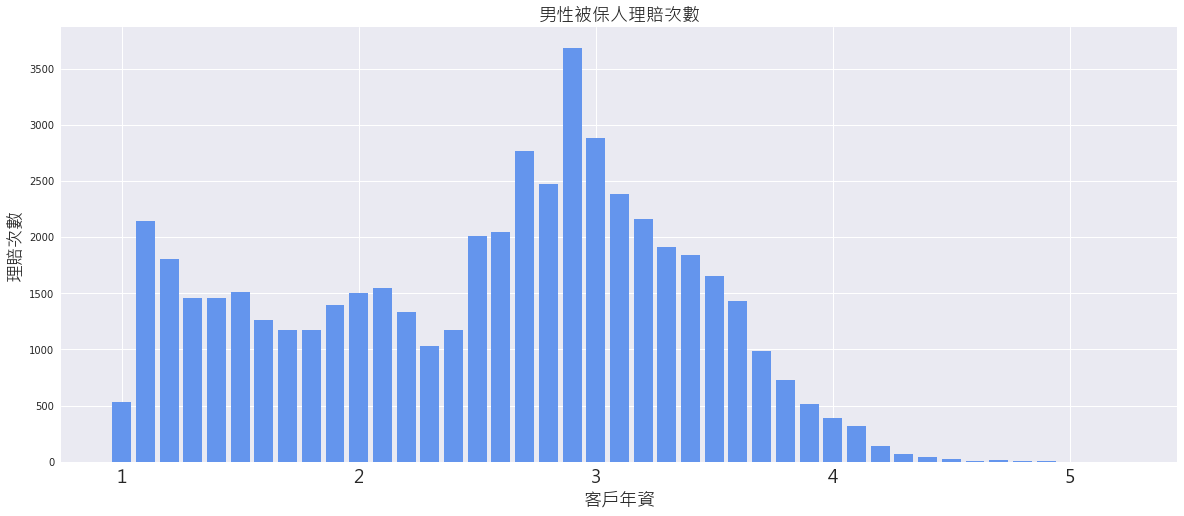

In [36]:
plt.style.use('seaborn')

def barplot(x_data, y_data, x_label="", y_label="", title="", color = "", rot = ""):
    
    if rot == 'Y':
        rotation = 90
    else:
        rotation = 0
    plt.figure(figsize=(20,8))
    ax = plt.subplot(111)
    
    
    font = font_manager.FontProperties(fname='msjh.ttc',
                               weight='bold',
                               style='normal', size=18)

    ax.bar(x_data, y_data, color = color, align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    #     ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label, fontproperties = font, fontsize = 20)
    ax.set_xlabel(x_label, fontproperties = font, fontsize = 20)
    ax.set_title(title, fontproperties = font, fontsize = 20)
    ax.set_xticklabels(x_data, fontproperties = font, rotation = rotation)
    
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color= '', yscale_log=True):

    # Create the plot object
    plt.figure(figsize=(10,8))
    
    font = font_manager.FontProperties(fname='msjh.ttc',
                               weight='bold',
                               style='normal', size=16)

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    plt.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)


    # Label the axes and provide a title
    plt.title(title, fontproperties=font)
    plt.xlabel(x_label, fontproperties=font)
    plt.ylabel(y_label, fontproperties=font)
    plt.show()
    

# grouping the clients based on gender and ages
info = file.groupby(['被保人性別', '客戶年資'])['理賠日期'].count()

# plot the two bar charts based on different gender
barplot(list(info['F'].index), list(info['F'].tolist()), '客戶年資', '理賠次數', '女性被保人理賠次數', 'mediumorchid')
barplot(list(info['M'].index), list(info['M'].tolist()), '客戶年資', '理賠次數', '男性被保人理賠次數', 'cornflowerblue')

Based on the two barchats displayed above, it seems that a large number of claims are made within one year after the purchase. The largest number of claims lies around age 20. The two observations are consistent for both male and female clients. The total number of claims by females is slightly higher than that of male clients, however, in general two genders do not deviate to much from one another. An interesting thing to note is that the number of claims start of decrease after age 20. Normally we would expect the elderly to be in greater needs of insurance products. This could be due to that fact that the sample size is not large enough, excluding the majority of data for elderly clients, or simply that Nanshan life insurance does not have a sufficient number of elderly clients. In the following, instead of plotting the total counts, we will show the average dollar amount claimed based on age. 

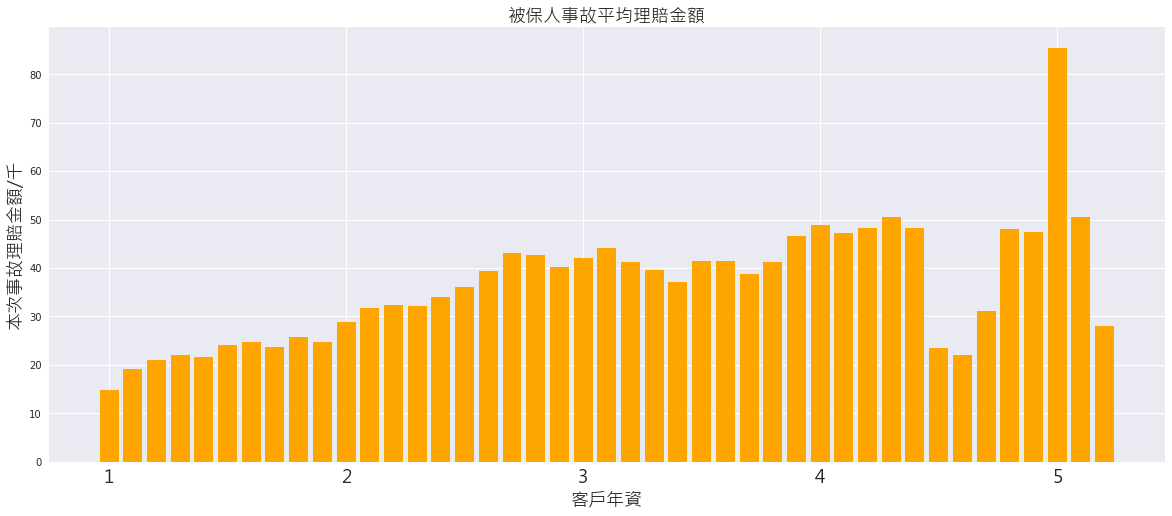

In [5]:
# grouping the clients based on age
claim_amount = file.groupby(['客戶年資'])['本次事故理賠金額/千'].mean()

# plot the bar charts based on age
barplot(list(claim_amount.index), list(claim_amount.tolist()), '客戶年資', '本次事故理賠金額/千', '被保人事故平均理賠金額', 'orange')

As observed above, average dollar claim increases with the age of our clients. However, after age 30, due to the limited data set, we are unable to draw any conclusions with regards to insurance claims. Given that as people become older, there is a greater need to purchase insurance. Next we will see the annual insurance payment made by clients based on age. We will also show the number of different insurance products purchased by these clients.  

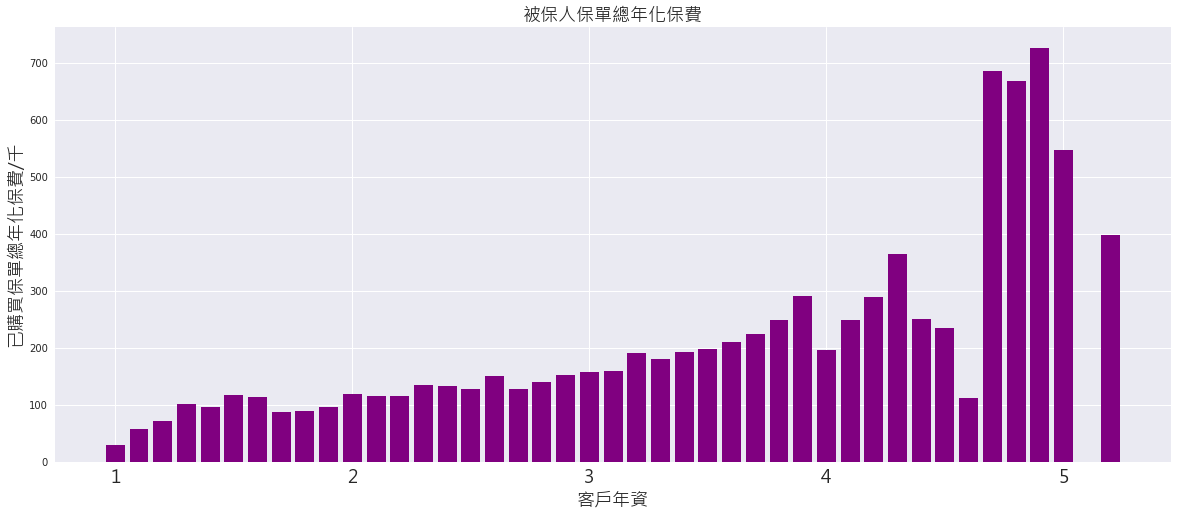

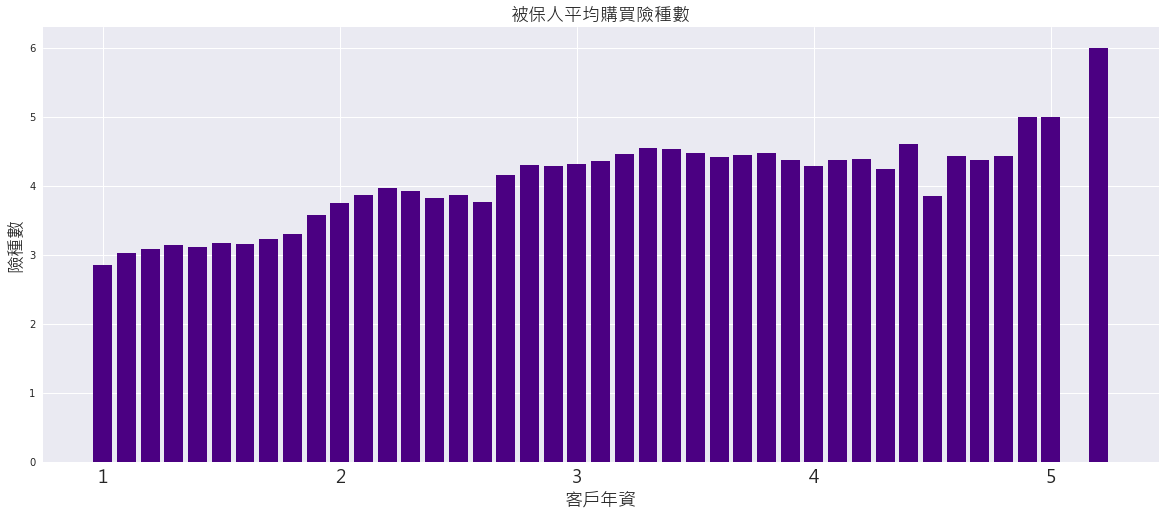

In [6]:
# grouping the clients based on age
cost = file.groupby(['客戶年資'])['已購買保單總年化保費/千'].mean()

# plot the two bar
barplot(list(cost.index), list(cost.tolist()), '客戶年資', '已購買保單總年化保費/千', '被保人保單總年化保費', 'purple')

# grouping the clients based on age
cost = file.groupby(['客戶年資'])['已購買險種數'].mean()

# plot the two bar
barplot(list(cost.index), list(cost.tolist()), '客戶年資', '險種數', '被保人平均購買險種數', 'indigo')

It does appear that between ages 0 to 30, there exists a positive correlation between ages and the amount paid for insurance coverage as well as the number of insurance prodcuts needed. 

#### In the following part we will determine the suitable types of products for clients by looking at number of claims and average dollar amount claimed amount for each disease, injury, illness and etc. 



In [7]:
disease_type = set(file['疾病名稱'].tolist())
print(len(disease_type))
print(disease_type)

415
{nan, '不明熱', '包皮過長，包莖及包皮發炎', '乳房良性腫瘤', '肱骨骨折', '結膜之疾患', '缺血性心臟病', '白血球缺少症', '舌癌', '腕部神經壓迫症', '女性生殖器官良性腫瘤', '在TNM分期系統為T1N0M0者之顯微性乳突狀甲狀腺癌', '肝膿瘍', '排尿障礙（尿崩,尿漏,頻尿,困難失禁）', '足部，足趾截斷傷', '其他部位良性腫瘤', '淚器系疾患', '其他女性生殖器官疾病', '其他尿液異常', '其他耳及乳突之疾病', '乳房之惡性腫瘤', '上肢', '冠狀動脈疾病', '肝功能異常', '斜頸', '急性上呼吸道感染', '鼻炎', '肘及前臂之脫臼，扭，拉，挫，捩傷', '頸椎退化', '韌帶損傷,斷裂', '蹠骨骨折（含趾骨）', '中暑', '眼附屬器官外傷（眼瞼,眼眶等）', '腮腺炎', '口腔軟組織疾病', '膽結石', '二尖瓣,三尖瓣疾病（狹窄,閉鎖不全,脫垂）', '帶狀皰疹', '早產兒/低體重兒', '心包膜炎', '疣，癤', '下肢（大，小腿）截斷傷', '產後大出血', '腓骨骨折', '脊髓病變', '腹腔疝氣（腹股溝疝氣及其他）', '禽流感或新型流行性感冒（含可能及疑似病例）', '肢體麻庳', '踝骨，跟骨，距骨骨折', '攝護腺（前列腺）之惡性腫瘤', '心臟性節律不整', '低血壓', '腦水腫', '中耳炎及乳突炎', '胃潰瘍', '脛骨骨折', '攝護腺（前列腺）疾病（發炎,肥大等）', '脊椎側彎（彎曲）症', '過敏性紫斑', '甲溝炎', '貧血', '精神官能症', '膀胱炎', '猛暴性肝炎', '外耳炎', '傳導阻礙', '痙攣,抽搐', '巴氏腺囊腫，巴氏腺膿瘍', '支氣管肺炎', '腸套疊', '其他細菌性疾病', '胃腸不適', '神經痛', '胸（肋）膜炎，積水', '氣管，支氣管之惡性腫瘤', '發（高）燒', '顱內出血', '軀幹', '肝硬化', '臉，頭，頸部', '前置胎盤', '胎盤早期剝離', '葡萄胎', '腰及背部之脫臼，扭，拉，挫，捩傷', '胸痛', '其他肝病變', '硬腦膜下出血', '卵巢邊緣性癌症', '其他部位外傷', '暈厥及昏迷', '掌骨骨折（含指骨）', '其他節肢動物媒介之疾病', '尿道/

Given that there are more than 400 different types, we will only look at the top and bottom 20

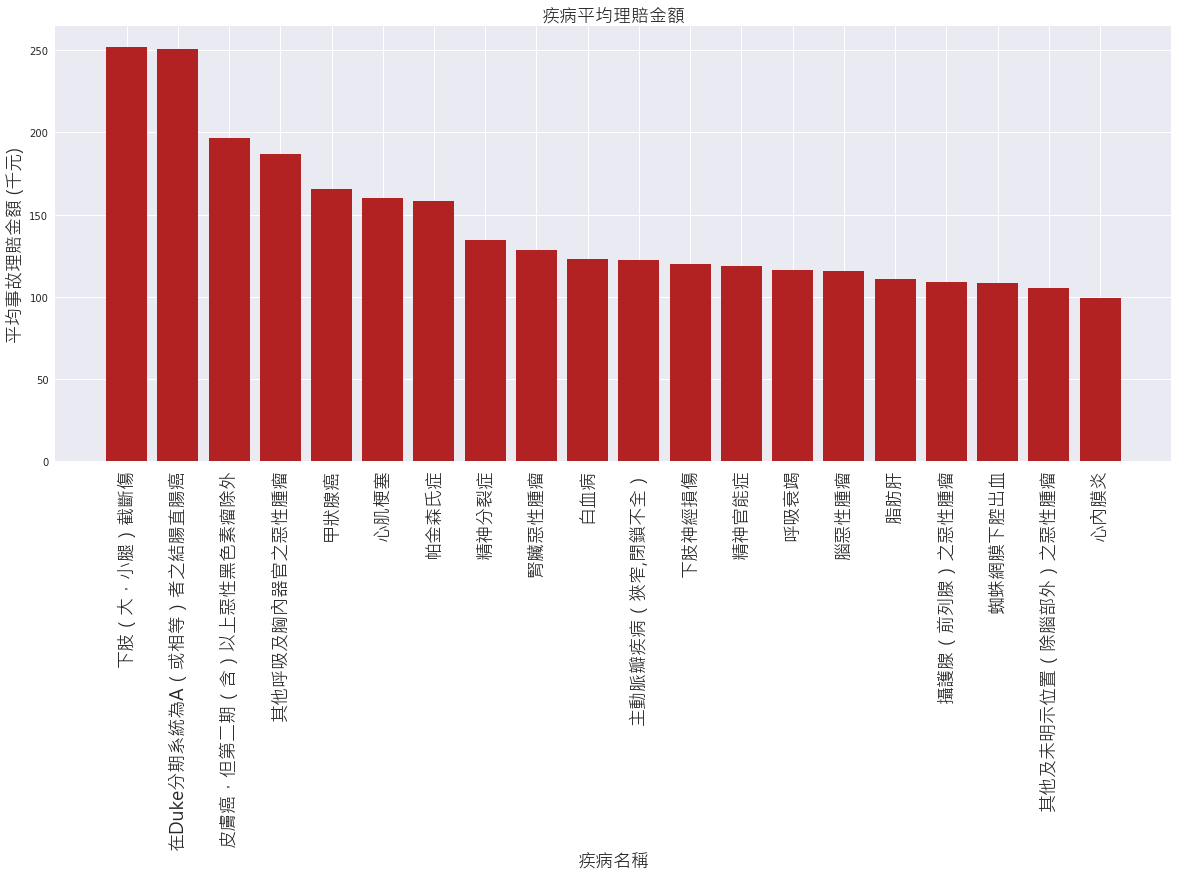

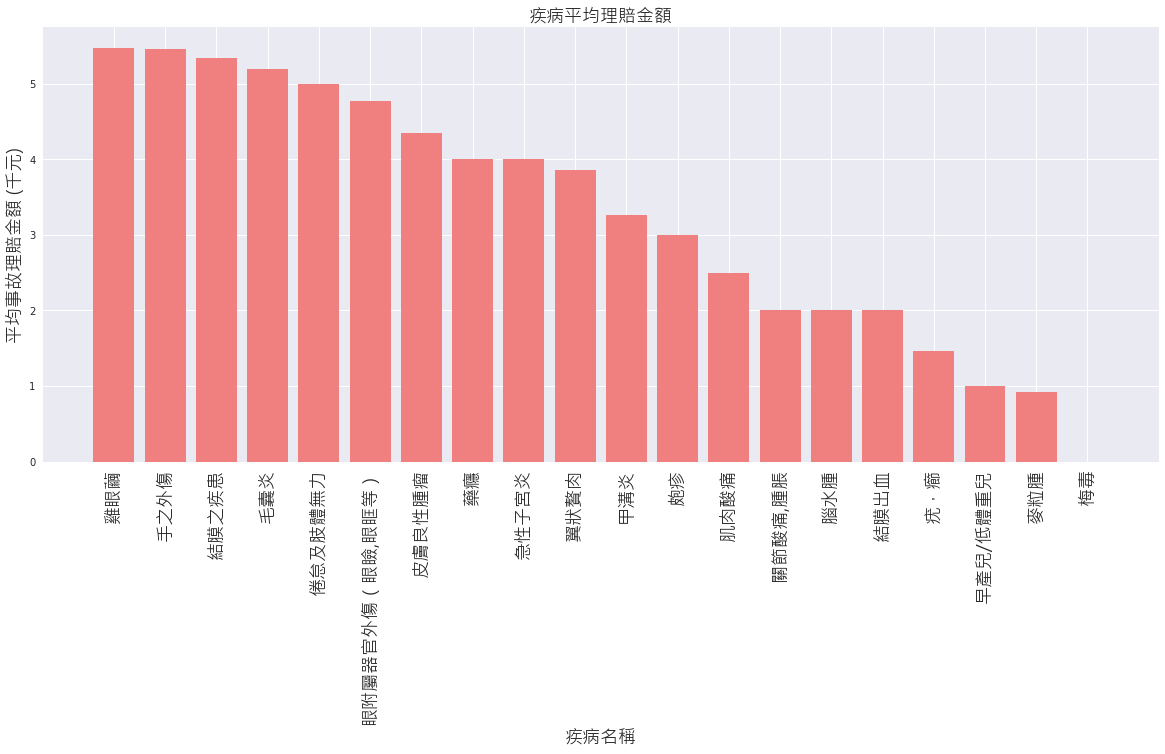

In [8]:
data = file.groupby(['疾病名稱'])['本次事故理賠金額/千'].mean()
graph = data.sort_values()[::-1]

illness = list(graph.index)[:20]
averageCost = list(graph)[:20]
barplot(illness, averageCost, '疾病名稱', '平均事故理賠金額 (千元)', '疾病平均理賠金額','firebrick', 'Y')

illness = list(graph.index)[-20:]
averageCost = list(graph)[-20:]
barplot(illness, averageCost, '疾病名稱', '平均事故理賠金額 (千元)', '疾病平均理賠金額', 'lightcoral','Y')

As shown above, the average insruance claim for some diseases range up to 250,000 NTD while some are as low as $1000. 

The follow up question would be:  Are clients paying a resonable price for these insurance products?
To figure this out, we will look at the total amount claimed vs the total amount paid for each disease. 

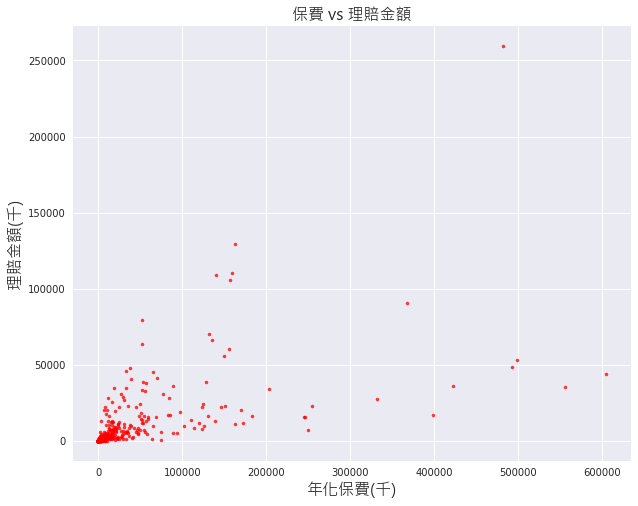

In [9]:
total_claimed = file.groupby(['疾病名稱'])['本次事故理賠金額/千'].sum()
total_price = file.groupby(['疾病名稱'])['已購買保單總年化保費/千'].sum()

scatterplot(total_price.tolist(), total_claimed.tolist(), '年化保費(千)', '理賠金額(千)', '保費 vs 理賠金額', 'red')

The graph above reveals that there are indeed some diseases where the cost of insurance is high but the total claimed amount is low. 
From the perspective of clients, the best type of insurance would be those with high claimed amount with low cost; whereas for the insurance it would be the opposite. Therefore, clients should be in favor of purchasing insurance producst with higher claimed/cost ratio. 

In [10]:
ratio = total_claimed/total_price

ratioDF = pd.DataFrame({'Total Annual Cost' : total_price, 'Total Dollar Claimed': total_claimed, 'Ratio':ratio}, columns = ['Total Dollar Claimed', 'Total Annual Cost', 'Ratio'])
ratioDF = ratioDF[ratioDF['Ratio'] != np.inf]
ratioDF = ratioDF[ratioDF['Ratio'] != 0]
ratioDF.sort_values(['Ratio'], ascending = False, inplace = True)

print('Clients should buy insurance that covers these type of diseases: \n')
ratioDF.head(10)

Clients should buy insurance that covers these type of diseases: 



,Total Dollar Claimed,Total Annual Cost,Ratio
疾病名稱,,,
下肢神經損傷,601,101.0,5.950495
顎裂及唇裂（兔唇）,56,10.0,5.600000
呼吸衰竭,12908,2925.0,4.412991
脂肪肝,554,156.0,3.551282
心內膜炎,893,252.0,3.543651
精神官能症,1780,512.0,3.476562
喉惡性腫瘤,5800,1734.0,3.344867
其他器官結核病,47,15.0,3.133333
精神分裂症,20084,7233.0,2.776718


In [11]:
print('Insurnace companies should sell insurance that covers these type of diseases: \n')
ratioDF.tail(10)

Insurnace companies should sell insurance that covers these type of diseases: 



,Total Dollar Claimed,Total Annual Cost,Ratio
疾病名稱,,,
"眼附屬器官外傷（眼瞼,眼眶等）",1045,29338.0,0.035619
皮膚良性腫瘤,7358,249684.0,0.029469
結膜之疾患,160,5481.0,0.029192
腰痛，背痛,1618,64302.0,0.025163
結膜出血,2,94.0,0.021277
倦怠及肢體無力,25,1182.0,0.021151
甲溝炎,425,20322.0,0.020913
麥粒腫,100,10345.0,0.009667
疣，癤,524,75303.0,0.006959


One major limitation to this analysis is that most insurance products provide coverage over a range of different diseases/injuries. The data provided by Nanshan lists the individual diseases/injuries directly related to the insurance claim but does not show the specific name and type of insurance product purchase by the client. As a result we are unable to determine how these diseases/injuries are grouped and perform precise calculations. 

#### In the last part of our analysis we will look at the relationship between recent claims and repurchases

First let's look at the types of insurance that are most commonly repurchased and see the counts and average costs. 

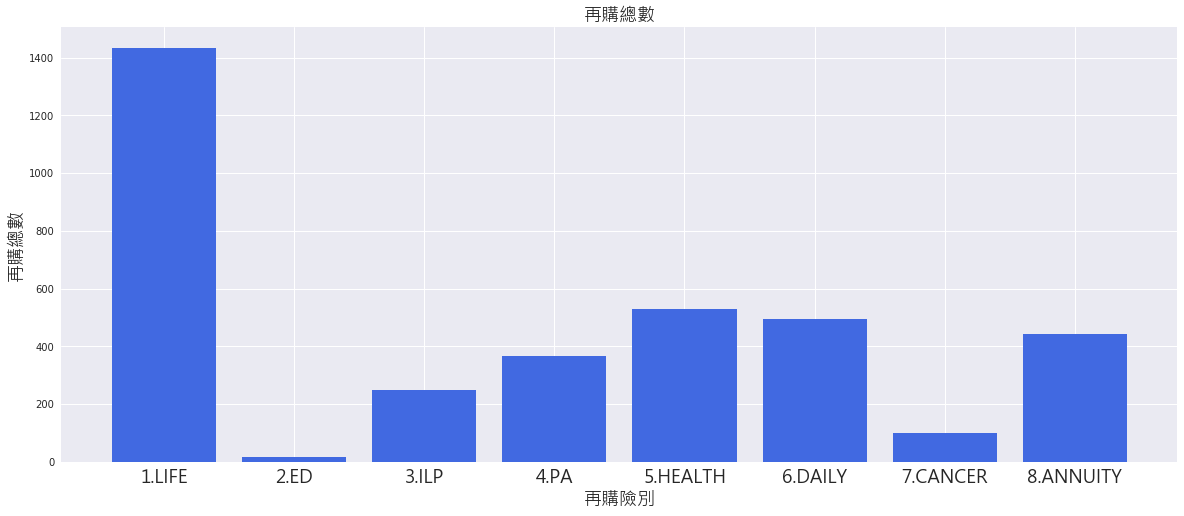

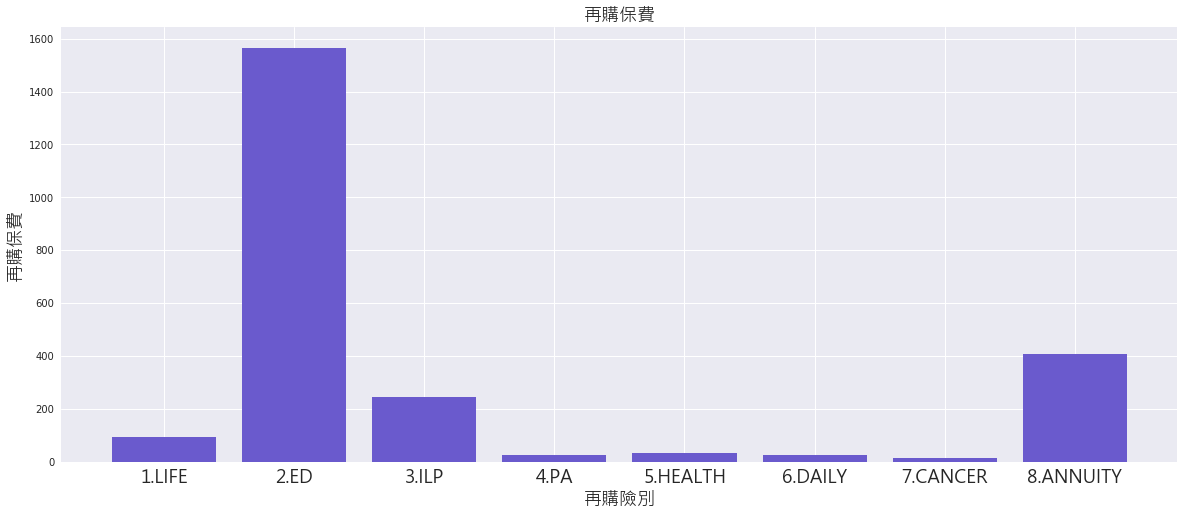

In [18]:
# Filtering out rows that do not have repurchases
repo = file.fillna(0)
repo = repo[repo['再購險別'] != 0]

repo_count = repo.groupby(['再購險別'])['再購保單年化保費/千'].count()
barplot(list(repo_count.index), list(repo_count.tolist()), '再購險別', '再購總數', '再購總數', 'royalblue')

repo_count = repo.groupby(['再購險別'])['再購保單年化保費/千'].mean()
barplot(list(repo_count.index), list(repo_count.tolist()), '再購險別', '再購保費', '再購保費', 'slateblue')

The above results indicate that clients frequently repurchase life insurance. However, clients are willing to pay more for earthquake and disaster types of insurance. Next we will look at the time between the last insurance claim and the new repurhcase insurance. 

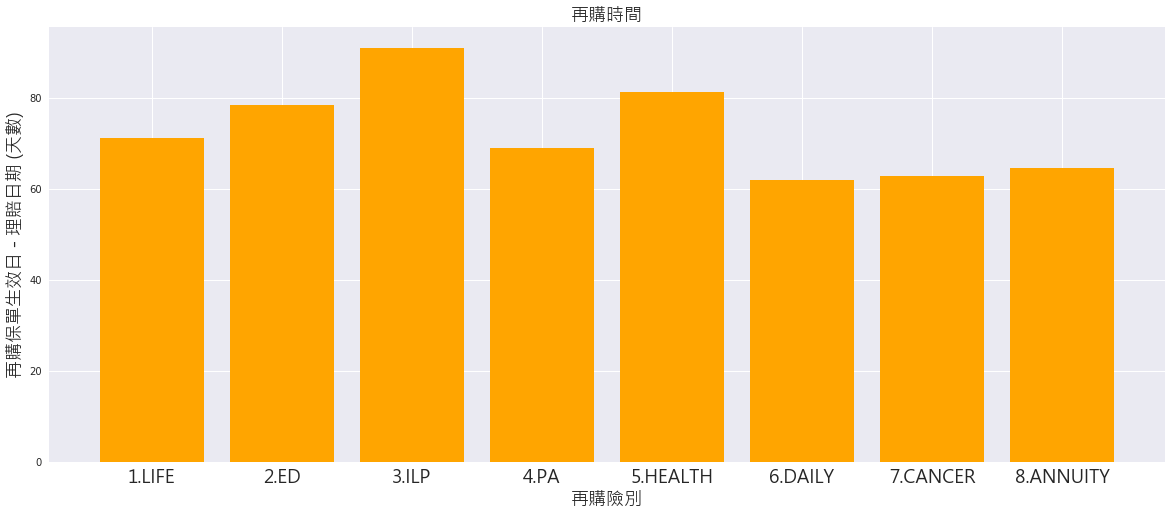

In [19]:
end_date = pd.to_datetime(repo['理賠日期'])
start_date = pd.to_datetime(repo['再購保單生效日'])
repo['time'] = (start_date - end_date).astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)
repo_lag = repo.groupby(['再購險別'])['time'].mean()
barplot(list(repo_lag.index), list(repo_lag.tolist()), '再購險別', '再購保單生效日 - 理賠日期 (天數)', '再購時間', 'orange')

The average time between making an insurance claim and purchasing a new product does not vary too much between different insruance types. 
Below we will look at the top diseases/injuries related to each of the repurchased types

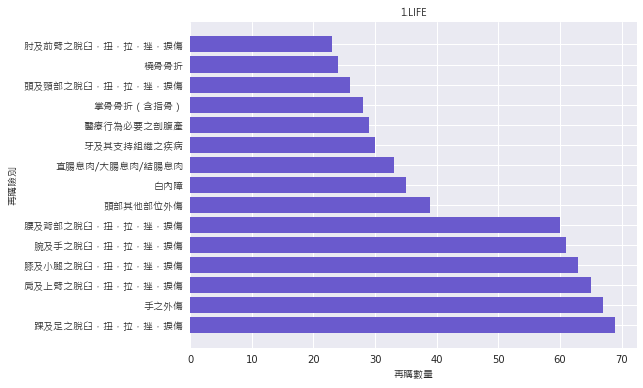

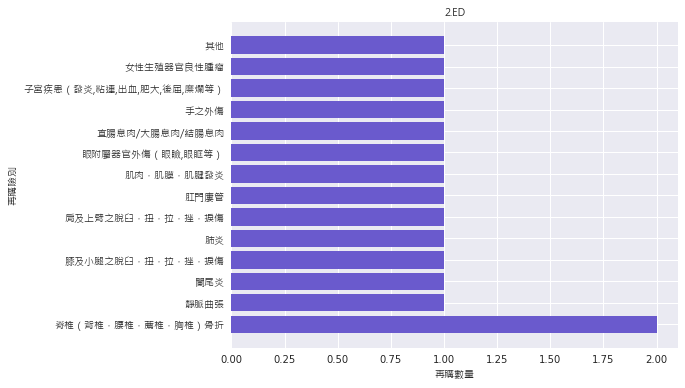

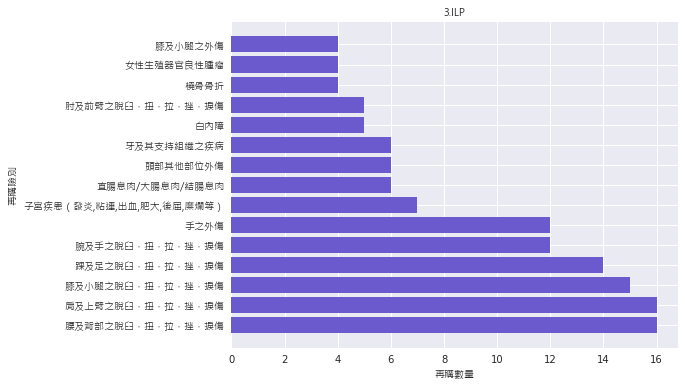

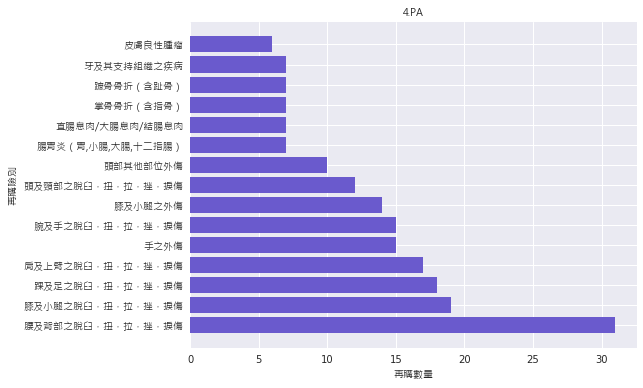

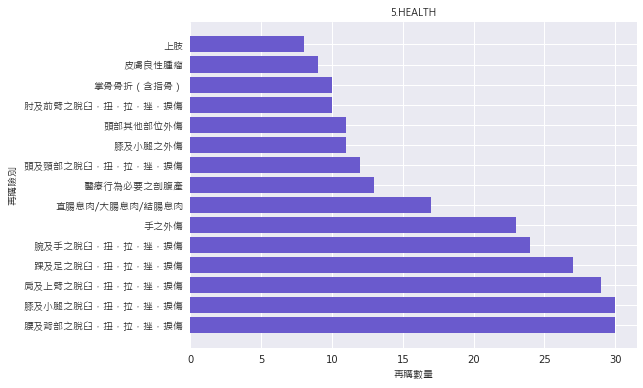

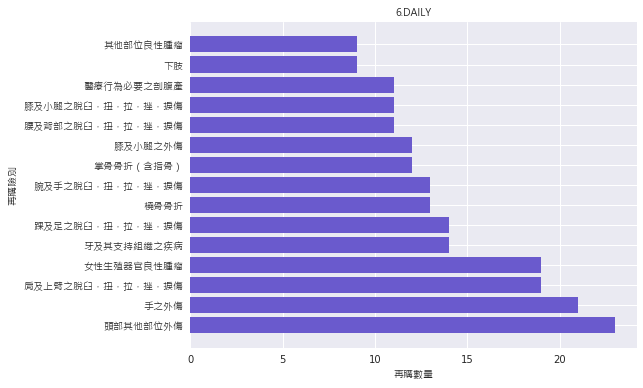

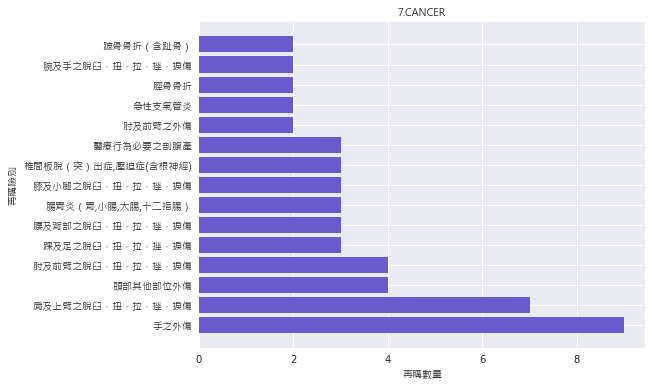

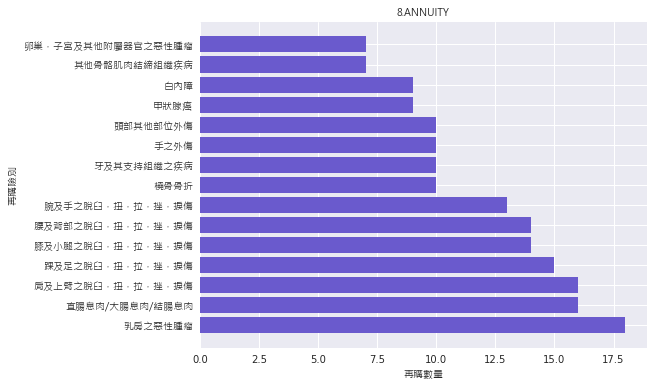

In [14]:
def vbarplot(x_data, y_data, y_label="", x_label="", title="", color = "", rot = ""):
    
    if rot == 'Y':
        rotation = 90
    else:
        rotation = 0
    plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    
    
    font = font_manager.FontProperties(fname='msjh.ttc',
                               weight='bold',
                               style='normal', size=10)

    ax.barh(x_data, y_data, color = color, align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    #     ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label, fontproperties = font, fontsize = 15)
    ax.set_xlabel(x_label, fontproperties = font, fontsize = 15)
    ax.set_title(title, fontproperties = font, fontsize = 15)
    ax.set_yticklabels(x_data, fontproperties = font, rotation = rotation)
    
    


repo_types = repo.groupby(['再購險別', '疾病名稱'])['疾病名稱'].count()
repo_name = set(repo['再購險別'])
repo_name = sorted(list(repo_name))
for i in range(8):
    name = repo_name[i]
    vbar = repo_types[name].sort_values(ascending = False).head(15)
    vbarplot(list(vbar.index), list(vbar.tolist()), '再購險別', '再購數量', name, 'slateblue', '')

Lastly we will look at whether the total amount of insurance claims made within five years are related to the value of repurchased insurance

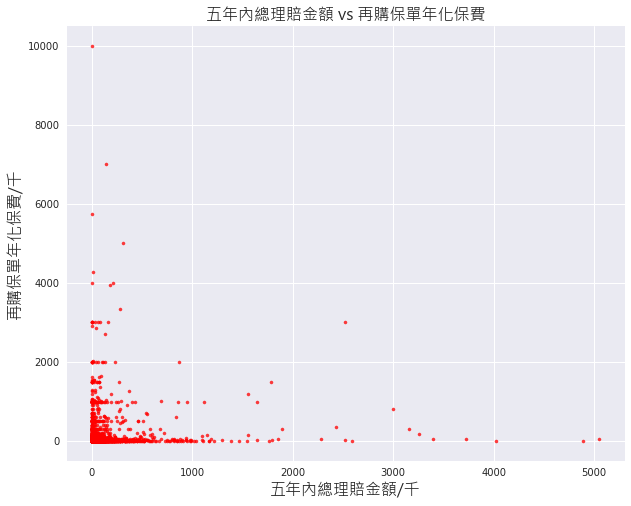

In [31]:
scatterplot(repo['五年內總理賠金額/千'].tolist(), repo['再購保單年化保費/千'].tolist(), '五年內總理賠金額/千', '再購保單年化保費/千', '五年內總理賠金額 vs 再購保單年化保費', 'red')

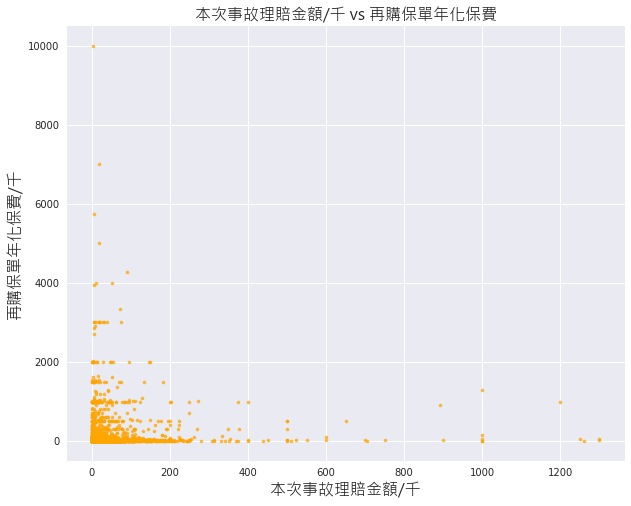

In [38]:
scatterplot(repo['本次事故理賠金額/千'].tolist(), repo['再購保單年化保費/千'].tolist(), '本次事故理賠金額/千', '再購保單年化保費/千', '本次事故理賠金額/千 vs 再購保單年化保費', 'orange')

### Summary 

##### 1. Elderly clients on average pay more for insurance and receive more benefits from insurance claims
##### 2. Injuries relating to 下肢（大，小腿）截斷傷 provide the most coverage in terms of dollar value
##### 3. There does not seem to be a clear relationship between previous insurance claims and future purchases